
# AMAZOM ALEXA REVIEW -Sentiment Analysis

In [ ]:
# analyzing the amazon_alexa dataset and building classification models to predict if the sentiment of a given  input sentence is +ve or - ve

# importing required libraries

In [1]:
import pandas as pd
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter  import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
from sklearn.model_selection import KFold
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re
from sklearn.cluster import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load the data
data=pd.read_csv("sentiment_analysis using mlp/amazon_alexa.csv")
data.shape

(3150, 5)

In [3]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
print(f"Feature names: :{data.columns.values}")

Feature names: :['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [5]:
# check for  null values
data.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
#there is one record with no verified_reviews(null value)


In [7]:
# getting the record where 'verified_reviews'is null
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [8]:
# we will drop the null records
data.dropna(inplace=True)

In [9]:
print(f"Dataset shape aftet droping null values:{data.shape}")


Dataset shape aftet droping null values:(3149, 5)


In [10]:
# creating a new column 'length ' that will contain the length of thw str in verified_reviews' column
data['length']=data['verified_reviews'].apply(len)
print(data.head(11))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
1        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
4        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    

                                     verified_reviews  feedback  length  
0                                       Love my Echo!         1      13  
1                                           Loved it!         1       9  
2   Sometimes while playing a game, you can answer...         1     195  
3   I have had a lot of fun with this thing. My 4 ...         1     172  
4                                               Music         1  

In [11]:
# randomly checking for 10th record
print(f"'verified_reviews'column value: {data.iloc[10]['verified_reviews']}")
print(f"length of review:{len(data.iloc[10]['verified_reviews'])}")
print(f"length column value: {data.iloc[10]['length']}")

'verified_reviews'column value: I sent it to my 85 year old Dad, and he talks to it constantly.
length of review:63
length column value: 63


In [12]:
# we can see that the length of review is the same as the value in the length column for that record

In [13]:
# datatype of the feature

In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

# analyzing the rating column

In [15]:
# this column refers to the  rating  of the variation given by the user

In [16]:

#distinct values of rating  and its count

print(f"rating  value count:\n {data['rating'].value_counts()}")

rating  value count:
 rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


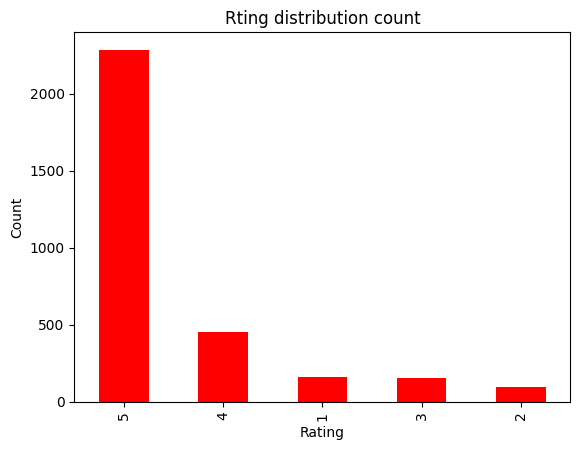

In [17]:
# Bar plot to visualize the total couns of rating
data['rating'].value_counts().plot.bar(color='red')
plt.title("Rting distribution count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [18]:
# finding the  percentage distributuion of  each rating =we'll divide the number of records  for each rating by total number of  records
print(f"Rating value count-percentage distributuion:\n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count-percentage distributuion:
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


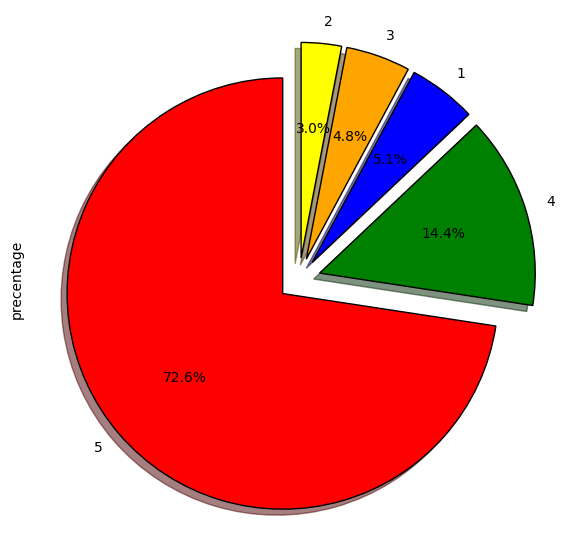

In [19]:
fig=plt.figure(figsize=(7,7))
color=('red','green','blue','orange','yellow')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=color,startangle=90,wedgeprops=wp,explode=explode,label='precentage')
from io import BytesIO
graph=BytesIO()
fig.savefig(graph, format='png')

# Analyzing feedback
this column refers to the feedbackof the verified review

In [20]:
# Distinct values of feedback and its count
print(f"Feedbacl value count:\n{data['feedback'].value_counts()}")

Feedbacl value count:
feedback
1    2893
0     256
Name: count, dtype: int64


In [21]:
# Extracting the verified_reviews value for one record with feedback
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']
review_0

'Sound is terrible if u want good music too get a bose'

In [22]:
# Extracting the verified_reviews value for one record with feedback
review_0=data[data['feedback']==1].iloc[1]['verified_reviews']
review_0

'Loved it!'

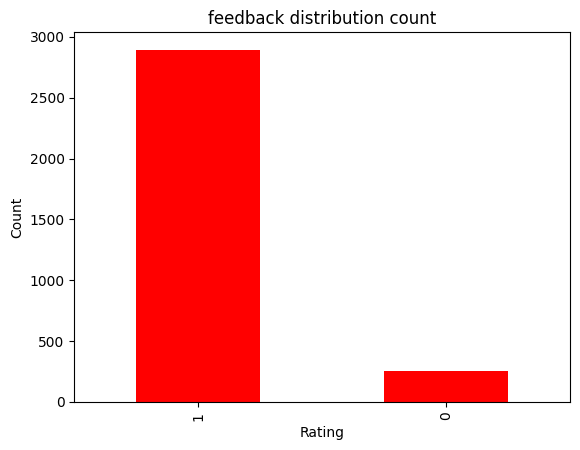

In [23]:
# Bar plot to visualize the total couns of rating
data['feedback'].value_counts().plot.bar(color='red')
plt.title("feedback distribution count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [24]:
# finding the  percentage distributuion of  each feedback =we'll divide the number of records  for each feedback by total number of  records
print(f"feedback value count-percentage distributuion:\n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

feedback value count-percentage distributuion:
feedback
1    91.87
0     8.13
Name: count, dtype: float64


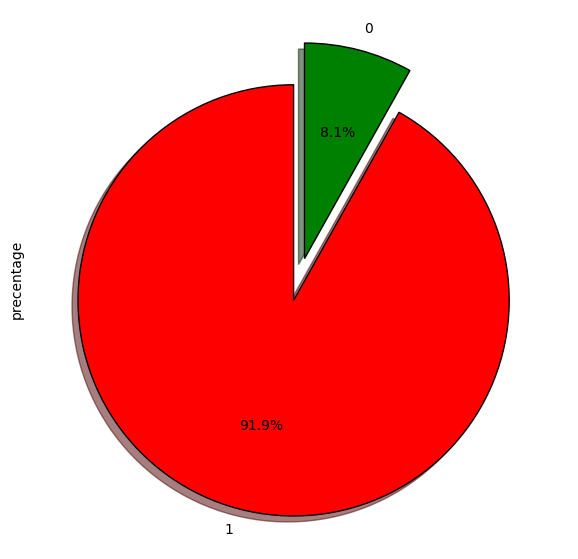

In [25]:
fig=plt.figure(figsize=(7,7))
color=('red','green')
wp={'linewidth':1,"edgecolor":'black'}
tags=data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=color,startangle=90,wedgeprops=wp,explode=explode,label='precentage')
from io import BytesIO
graph=BytesIO()
fig.savefig(graph, format='png')

In [26]:
# lets see the 'rating value for  different values of  feedback

In [27]:
# Feedback=0
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [28]:
# Feedback=1
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

# Aalyzind variation column


In [29]:
# this column refers to the variation or typr of amazon Alexa product .Exmples-black dot ,

In [30]:
#distinct value of variation and its count
print(f"variation value count:\n{data['variation'].value_counts()}")

variation value count:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


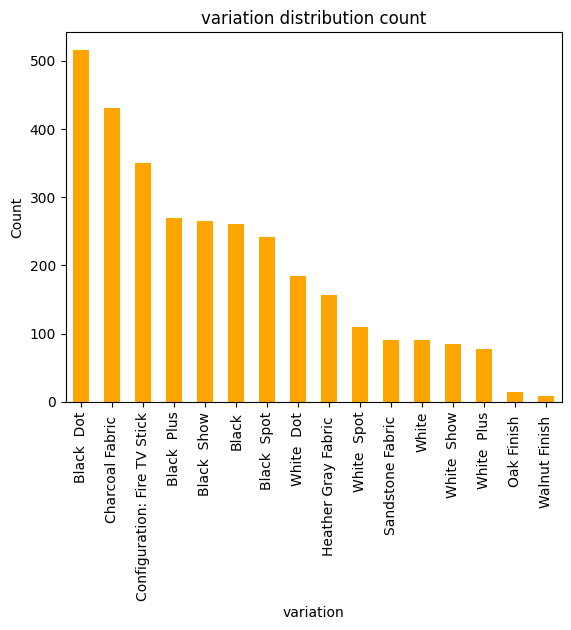

In [31]:
# Bar plot to visualize the total couns of rating
data['variation'].value_counts().plot.bar(color='orange')
plt.title("variation distribution count")
plt.xlabel("variation")
plt.ylabel("Count")
plt.show()

In [32]:
# finding the  percentage distributuion of  each variation =we'll divide the number of records  for each variation by total number of  records
print(f"variation value count-percentage distributuion:\n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

variation value count-percentage distributuion:
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [33]:
# mean rating according to variation

In [34]:
data.groupby("variation")['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

# lets analyze the above rating

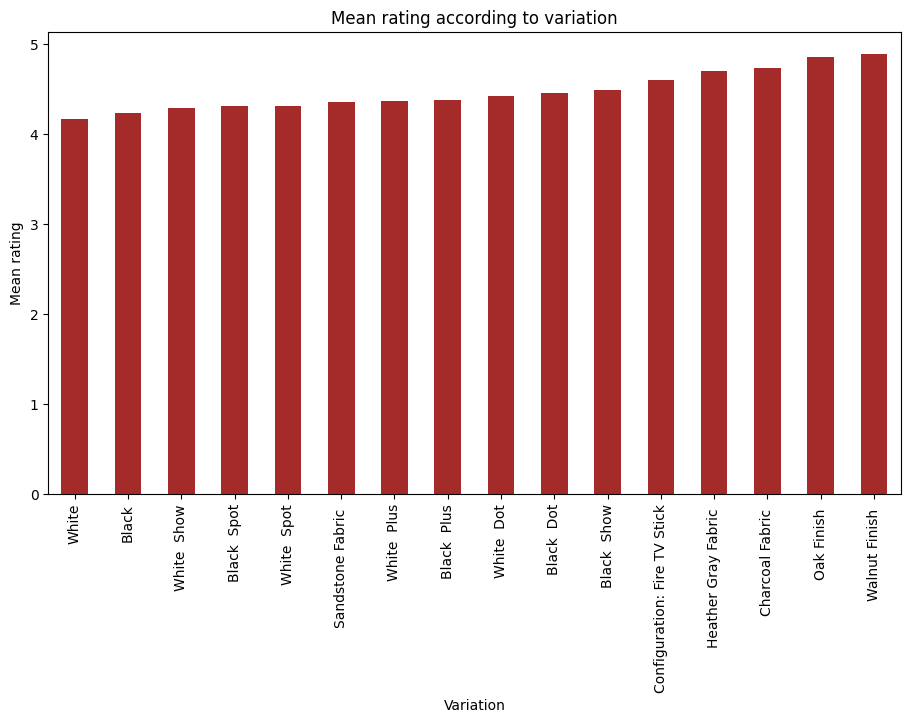

In [35]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown',figsize=(11,6))
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean rating")
plt.show()

# Analyzing  verified_reviews column

In [36]:
# This column contains the  textual review f=given by the users for s variation for th produt

In [37]:
data['length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [38]:
# Length analysis for full dataset

[Text(0.5, 1.0, 'Distribution of length of review')]

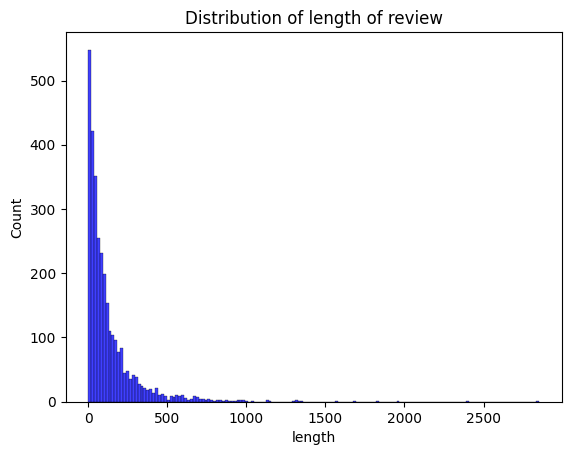

In [39]:
sns.histplot(data['length'],color='blue').set(title="Distribution of length of review")
                                              

[Text(0.5, 1.0, 'Distribution of length of review if fedback ==0')]

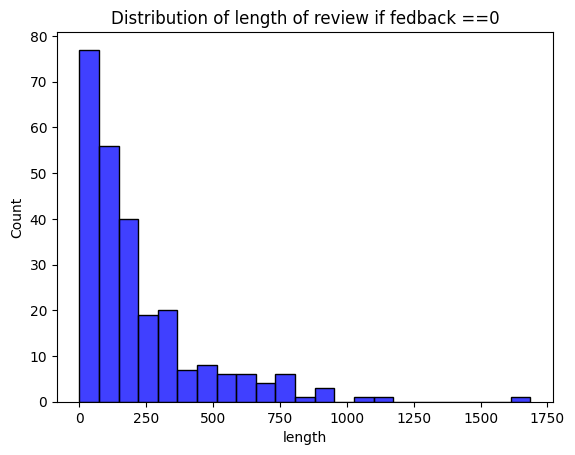

In [40]:
# length analysis when feedback is 0 
                                              
sns.histplot(data[data['feedback']==0]['length'],color='blue').set(title="Distribution of length of review if fedback ==0")
                                              

[Text(0.5, 1.0, 'Distribution of length of review if fedback ==1')]

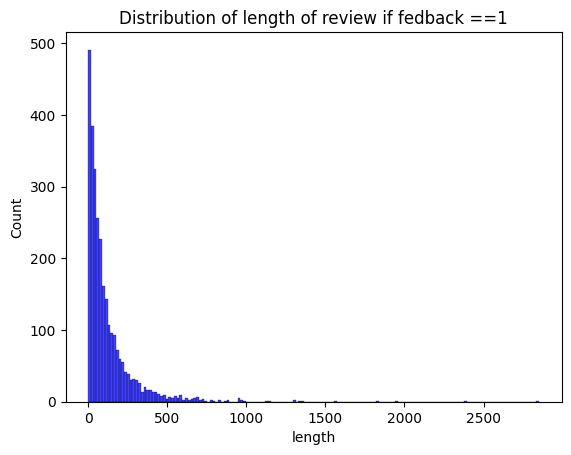

In [41]:
# length analysis when feedback is 1
                                              
sns.histplot(data[data['feedback']==1]['length'],color='blue').set(title="Distribution of length of review if fedback ==1")
                                              

In [42]:
# lengthwise mean rating

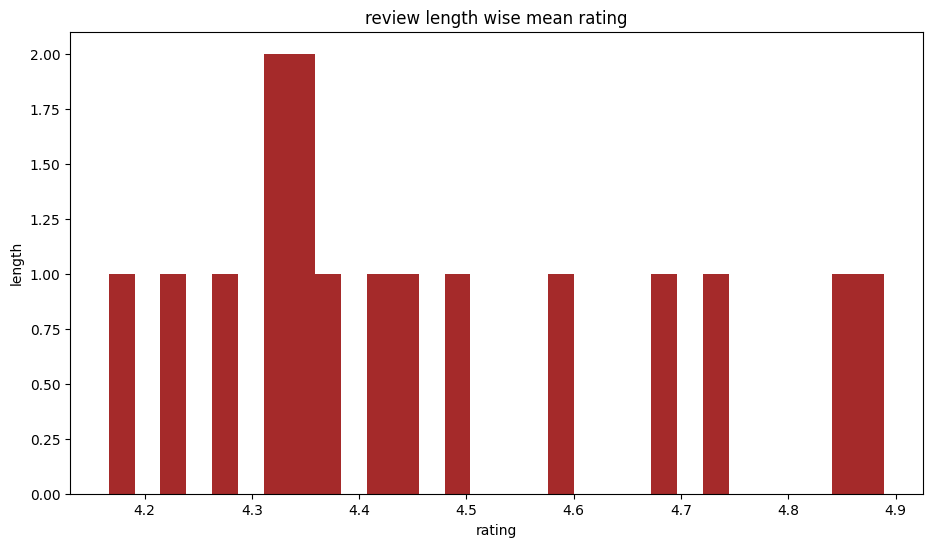

In [43]:
data.groupby('variation')['rating'].mean().sort_values().plot.hist(color='brown',figsize=(11,6),bins=30)
plt.title("review length wise mean rating")
plt.xlabel("rating")
plt.ylabel("length")
plt.show()

In [44]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

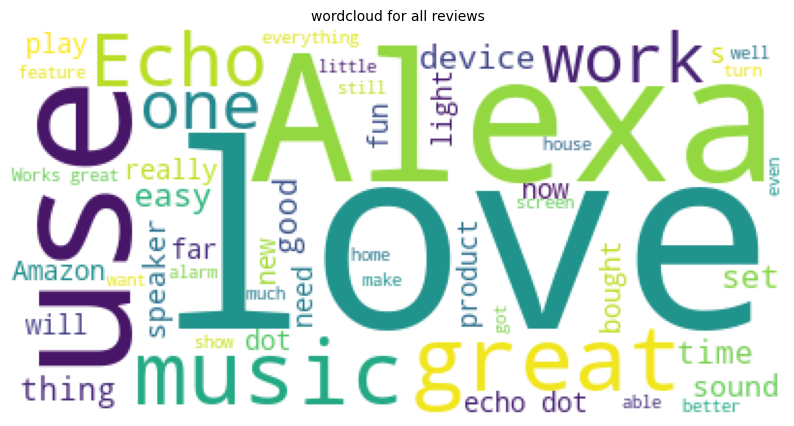

In [45]:
# Conbine all reviews
reviews=" ".join([review for review in data['verified_reviews']])
#Initialize wordcloud object
wc=WordCloud(background_color='white',max_words=50)
#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("wordcloud for all reviews",fontsize=10)
plt.axis('off')
plt.show()

In [46]:
# negative  word can be seen in the above word cloud-garbage,pointless ,poor,horrible, repair,etc

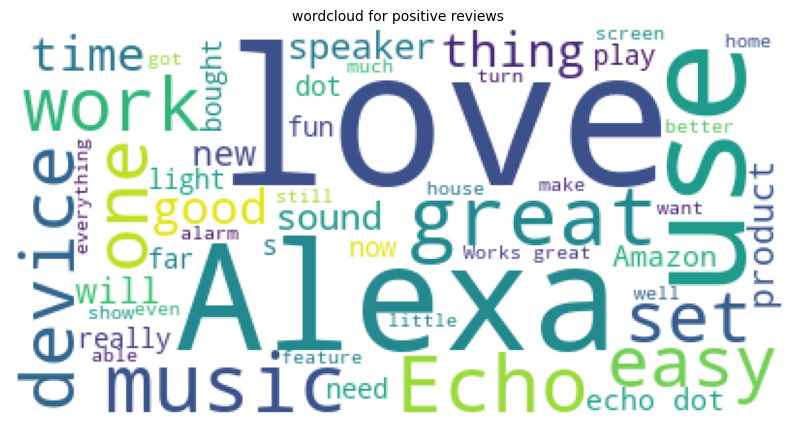

In [47]:
wc=WordCloud(background_color='white',max_words=50)
#generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("wordcloud for positive reviews",fontsize=10)
plt.axis('off')
plt.show()

In [48]:
# positive word can bee seen in the above word love,greate etc

# preprocessing and modelling

In [49]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
     review=re.sub('[^a-zA-z]',' ',data.iloc[i]['verified_reviews'])
     review=review.lower().split()
     review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
     review=' '.join(review)
     corpus.append(review)

In [50]:
# using count vectorizer to create bag of words

In [51]:
cv=CountVectorizer(max_features=2500)
#storing independent and dependent variables in x and y
x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [68]:
# # saving the count vectorizer
pickle.dump(cv,open('Models/CountVectorizer.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Models/CountVectorizer.pkl'

In [69]:
print(f"x shape:{x.shape}")
print(f"y shape:{y.shape}")

x shape:(3149, 2500)
y shape:(3149,)


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [71]:
print(f"x train:{x_train.shape}")
print(f"x test:{x_test.shape}")
print(f"y train:{y_train.shape}")
print(f"y test:{y_test.shape}")

x train:(2204, 2500)
x test:(945, 2500)
y train:(2204,)
y test:(945,)


In [72]:
print(f"x train max value:{x_train.max()}")
print(f"x test max value:{x_test.max()}")

x train max value:12
x test max value:10


In [73]:
scaler=MinMaxScaler()
x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.transform(x_test)

In [75]:
# # saving the scaler model
pickle.dump(scaler,open('Model/scaler.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Model/scaler.pkl'

# randomforest

In [76]:
#Fitting scaled x_train and y_train on random forest classifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train_scl,y_train)

RandomForestClassifier()

In [77]:
# accuracy of the model on training and testing data
print("Training Accuracy:",model_rf.score(x_train_scl,y_train))
print("Testning Accuracy:",model_rf.score(x_test_scl,y_test))

Training Accuracy: 0.9941016333938294
Testning Accuracy: 0.9417989417989417


In [78]:
# predicting on the test  set
y_pred=model_rf.predict(x_test_scl)

In [79]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)

In [80]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)

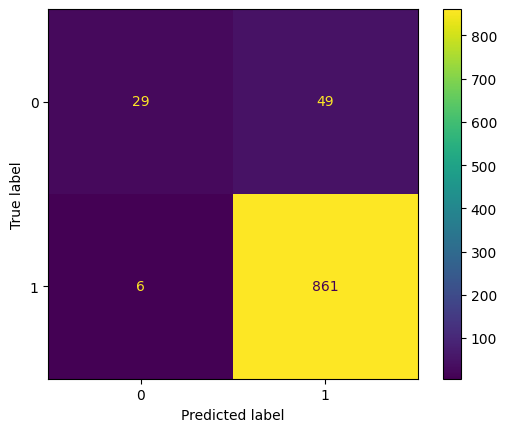

In [81]:
cm_display.plot()
plt.show()

In [89]:
# accuracies=cross_val_score(estimator=model_rf,x=x_train,y=y_train,cv=10)
# print("Accuracy:",accuracies.mean())
# print("standard variance:",accuracies.std())

TypeError: missing a required argument: 'X'

In [84]:
params={'bootstrap':[True],
        'max_depth':[80.100],
        'max_samples_split':[8,12],
        'n_estimators':[100,300]}


In [90]:
# cv_object=StratifieldFold(n_splits=2)
# grid_search=GridSearchCV(estimator=model_rf,param_grid=params,cv=cv_object,verbose=0,return_train_scire=True)
# grid_search.fit(x_train_scl,y_train.ravel())

NameError: name 'StratifieldFold' is not defined

In [91]:
# #getting the best parameters from the grid search
# print("best parameter combination:{}".format(grid_search.best_params_))

NameError: name 'grid_search' is not defined

In [106]:
# print("cross validation mean accuracy on train set :{}".format(grid_search.cv_result_['mean_train_score'].mean()*100))
# print("cross validation mean accuracy on test set :{}".format(grid_search.cv_result_['mean_test_score'].mean()*100))
# print("Acuracy scpore for test data set:",accuarcy_score(y_test,y_preds))

# xgboost

In [107]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
# accuracy of the model on trainingand testig data
print("Training Accuracy:",model_xgb.score(x_train_scl,y_train))
print("Testing Accuracy:",model_xgb.score(x_test_scl,y_test))

Training Accuracy: 0.971415607985481
Testing Accuracy: 0.9417989417989417


In [109]:
y_pred=model_xgb.predict(x_test)

In [110]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 31  47]
 [ 13 854]]


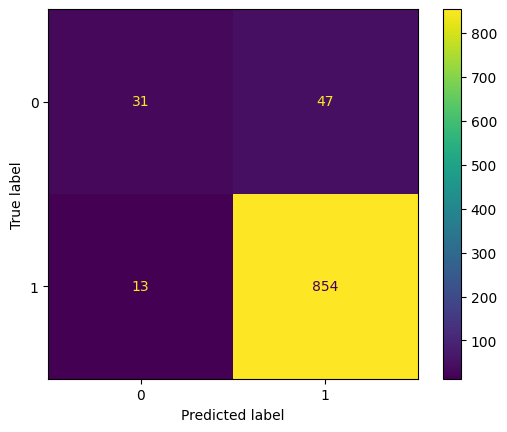

In [111]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [112]:
# #savingthe xgboost classifier
# pickle.dump(model_xgb,open('Models/model_xgb.pkl','wb'))

# decision tree classifier

In [113]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train_scl,y_train)

DecisionTreeClassifier()

In [114]:
#accuracy of the model on taring and testing data
print("training accuracy:",model_dt.score(x_train_scl,y_train))
print("testing accuracy:",model_dt.score(x_test_scl,y_test))

training accuracy: 0.9941016333938294
testing accuracy: 0.9164021164021164


In [115]:
y_pred=model_dt.predict(x_test)

In [116]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 43  35]
 [ 80 787]]


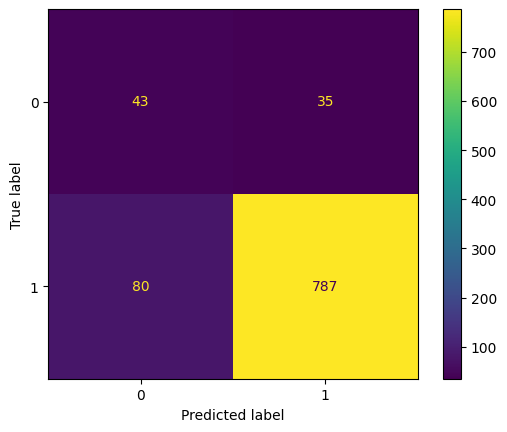

In [117]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()